In [39]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
api_key = "6bb7f55c691d1bdff841fdc67934b3b8"

### Find Song

In [3]:
def find_song(artist, track):
    results = []
    artists_list = []
    params_get_artists = {
        "method" : "artist.search",
        "format" : "json",
        "limit" : 100,
        "artist" : artist,
        "api_key" : api_key
    }
    artists = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_artists)
    for artist in artists.json()['results']['artistmatches']['artist']:
            artists_list.append(artist['name'])

    tracks_list = []
    params_get_tracks = {
        "method" : "track.search",
        "format" : "json",
        "limit" : 100,
        "track" : track,
        "api_key" : api_key
    }
    tracks = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_tracks)
    for track in tracks.json()['results']['trackmatches']['track']:
        if track['artist'] in artists_list:
            return_track = track['name']
            return_artist = track['artist']
            results.append((return_artist, return_track))
    if len(results) > 0:
        return results
    return('Could not find track. Please search again.')

## Get Artist Info

In [4]:
def get_artist_info(result_artist):
    params_artist_info = {
    "method" : "artist.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "api_key" : api_key
}
    artist_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_artist_info)
    content = artist_info.json()['artist']['bio']['content']
    listeners = int(artist_info.json()['artist']['stats']['listeners'])
    playcount = int(artist_info.json()['artist']['stats']['playcount'])
    return (listeners, playcount, content)

## Get Track Info

In [5]:
def get_track_info(result_artist, result_track):
    params_track_info = {
    "method" : "track.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "track" : result_track,
    "api_key" : api_key
}
    track_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_track_info)
    track_listeners = int(track_info.json()['track']['listeners'])
    track_playcounts = int(track_info.json()['track']['playcount'])
    track_duration = int(track_info.json()['track']['duration'])
    try:
        track_content = track_info.json()['track']['wiki']['content']
    except:
        track_content = 'Track information unavailable.'
    try:
        track_album = track_info.json()['track']['album']['title']
    except:
        track_album = 'Album unavailable.'
    return (track_duration, track_listeners, track_playcounts, track_album, track_content)

## Get Similar Tracks

In [6]:
def get_similar_tracks(result_artist, result_track):
    params_get_similar_tracks = {
        "method" : "track.getSimilar",
        "format" : "json",
        "artist" : result_artist,
        "track" : result_track,
        "api_key" : api_key
    }
    df = pd.DataFrame(columns = ['Info', 'Album', 'Duration', 'Listeners', 'Playcount'])
    similar_tracks = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_similar_tracks)
    counter = 1
    for sim_track in similar_tracks.json()['similartracks']['track'][:10]:
        return_similar_track = sim_track['name']
        return_similar_artist = sim_track['artist']['name']
        sim_track_duration, sim_track_listeners, sim_track_playcounts, sim_track_album, sim_track_content = get_track_info(return_similar_artist, return_similar_track)
        sim_df = pd.DataFrame({'Info' : [str(counter) + '. ' + return_similar_track + ' \n ' + return_similar_artist],
                               'Album' : [sim_track_album], 
                               'Duration' : [sim_track_duration], 
                               'Listeners' : [sim_track_listeners], 
                               'Playcount' : [sim_track_playcounts]})
        df = df.append(sim_df, ignore_index= True)
        counter += 1
    return df

## Get Similar Artists

In [7]:
def get_artist_counts(result_artist):
    params_artist_counts = {
    "method" : "artist.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "api_key" : api_key
}
    artist_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_artist_counts)
    listeners = int(artist_info.json()['artist']['stats']['listeners'])
    playcount = int(artist_info.json()['artist']['stats']['playcount'])
    return (listeners, playcount)

In [8]:
def get_similar_artists(result_artist):
    params_get_similar_artists = {
        "method" : "artist.getSimilar",
        "format" : "json",
        "artist" : result_artist,
        "api_key" : api_key
    }
    similar_artists = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_similar_artists)
    df_sim_artists = pd.DataFrame(columns = ['Info', 'Listeners', 'Playcount'])
    counter = 1
    for artist in similar_artists.json()['similarartists']['artist'][:10]:
        return_similar_artist_art = artist['name']
        sim_art_listeners, sim_art_playcount = get_artist_counts(return_similar_artist_art)
        df_sim_artists_art = pd.DataFrame({'Info' : [str(counter) + '. ' + return_similar_artist_art],
                                         'Listeners' : [sim_art_listeners],
                                         'Playcount' : [sim_art_playcount]})
        df_sim_artists = df_sim_artists.append(df_sim_artists_art, ignore_index = True)
        counter += 1
    return df_sim_artists

## Results

In [9]:
results = find_song(artist = 'stevie', track = "sir duke")
result_artist = results[0][0]
result_track = results[0][1]
print(result_artist)
print(result_track)

Stevie Wonder
Sir Duke


In [10]:
listeners, playcount, artist_info = get_artist_info(result_artist)
print(listeners)
print(playcount)
print(artist_info)

2291750
45513737

Stevie Wonder is the stage name of Stevland Hardaway Morris (b. Stevland Hardaway Judkins, 13 May 1950 in Saginaw, MI, USA - a.k.a. Little Stevie Wonder), a singer-songwriter, multi-instrumentalist, record producer and activist.  He débuted, as Little Stevie Wonder, with the single "I Call It Pretty Music, But the Old People Call It the Blues" (1961, Tamla Motown) and his latest album is "A Time 2 Love" (Oct 2005, Motown)

Stevland lost his eyesight shortly after birth. When he was four, his mother left his father, and moved with the children to Detroit.  She changed her name back to Lula Hardaway and later changed her son's surname to Morris, partly for family reasons. Stevland Morris has remained Stevie Wonder's legal name ever since.

Wonder signed with Motown's Tamla label at the age of eleven, and continues to perform and record for Motown to this day. Altogether, he has released more than thirty U.S. Top 10 hits and received twenty-two Grammy Awards, the most ev

In [11]:
track_duration, track_listeners, track_playcounts, track_album, track_content = get_track_info(result_artist, result_track)
print(track_duration)
print(track_listeners)
print(track_playcounts)
print(track_album)
print(track_content)

232000
480579
2142908
Songs in the Key of Life
"Sir Duke" is a song composed and performed by Stevie Wonder, from his 1976 album Songs in the Key of Life. The track topped the U.S. Billboard Hot 100 and Black Singles charts, and reached #2 in the UK Singles Chart, his biggest hit there at the time. It also reached #1 in the United World Chart.

The song was written about Duke Ellington, the great jazz artist who influenced Wonder's style. Ellington died in 1974 and the song was a tribute. The lyrics also refer to Count Basie, Glenn Miller, Louis Armstrong and Ella Fitzgerald.

The artists, apart from Stevie Wonder, who perform on the original version were: Raymond Pounds (drums), Nathan Watts (bass), Mike Sembello (lead guitar), Ben Bridges (rhythm guitar), Hank Redd (alto saxophone), Trevor Laurence (tenor saxophone), Raymond Maldonado (trumpet), and Steve Madaio (trumpet).

Wonder rerecorded the song for the live album Natural Wonder.

In the early to mid-1990s, "Sir Duke" was played

In [12]:
sim_tracks_df = get_similar_tracks(result_artist, result_track)

In [14]:
sim_tracks_df

,Info,Album,Duration,Listeners,Playcount
0,1. I Wish \n Stevie Wonder,Songs in the Key of Life,252000,309761,1238977
1,2. Village Ghetto Land \n Stevie Wonder,Songs in the Key of Life,205000,83246,240027
2,3. What's Going On \n Marvin Gaye,What's Going On,240000,575607,2575976
3,4. Let's Get It On \n Marvin Gaye,Let's Get It On,418000,537376,2332232
4,5. Move On Up \n Curtis Mayfield,The Very Best of Curtis Mayfield,528000,355887,1467580
5,6. Lovely Day \n Bill Withers,Lean on Me: The Best of Bill Withers,254000,448766,2183841
6,7. Let's Stay Together \n Al Green,Let's Stay Together,286000,730440,3708132
7,8. I Want You Back \n The Jackson 5,Motown 50,178000,872733,4467267
8,9. Use Me \n Bill Withers,Lean on Me: The Best of Bill Withers,510000,255557,1041003
9,10. Superfly \n Curtis Mayfield,The Very Best of Curtis Mayfield,232000,290524,971586


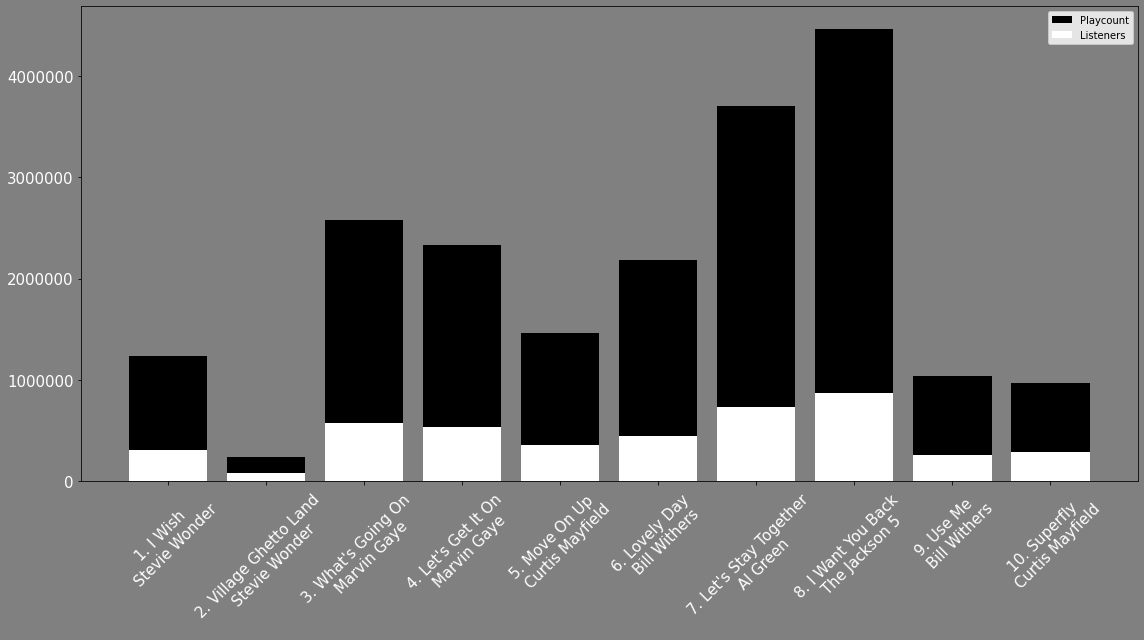

In [75]:
fig, ax = plt.subplots(figsize=(16, 9))

ax1 = ax.bar(sim_tracks_df['Info'], sim_tracks_df['Playcount'], label = 'Playcount', color = 'black')
ax2 = ax.bar(sim_tracks_df['Info'], sim_tracks_df['Listeners'], label = 'Listeners', color = 'white')


ax.ticklabel_format(style='plain', axis='y')
ax.set_facecolor((.5, .5, .5))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.yticks(color = 'white', fontsize = 15)
plt.xticks(color = 'white', fontsize = 15)
plt.tight_layout()
plt.legend()
plt.show();
fig.savefig('./sim_tracks.png', facecolor = 'black')

In [77]:
sim_art_df = get_similar_artists(result_artist)

In [78]:
sim_art_df

,Info,Listeners,Playcount
0,1. Marvin Gaye,2046102,35573418
1,"2. Earth, Wind & Fire",1321609,17597381
2,3. The Isley Brothers,1009010,8765989
3,4. Sly & The Family Stone,921501,11136649
4,5. The Jackson 5,1613689,16331700
5,6. Prince,1833387,46201049
6,7. Donny Hathaway,518916,3859353
7,8. The Temptations,1340368,13419123
8,9. Curtis Mayfield,904067,11255701
9,10. Bill Withers,1322678,15381617


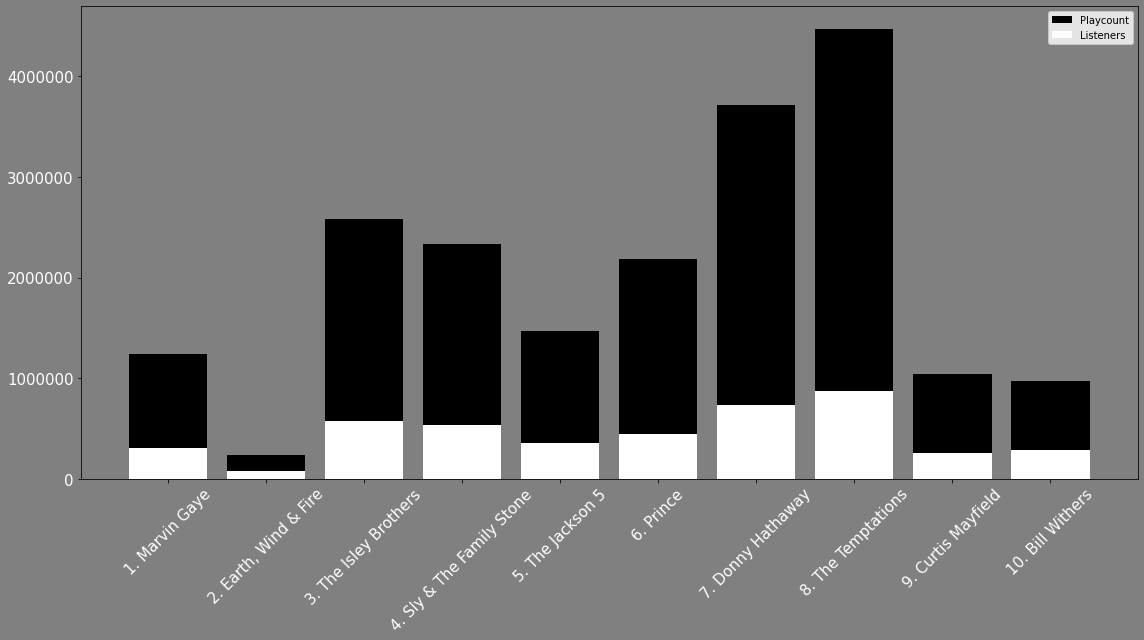

In [79]:
fig, ax = plt.subplots(figsize=(16, 9))

ax1 = ax.bar(sim_art_df['Info'], sim_tracks_df['Playcount'], label = 'Playcount', color = 'black')
ax2 = ax.bar(sim_art_df['Info'], sim_tracks_df['Listeners'], label = 'Listeners', color = 'white')


ax.ticklabel_format(style='plain', axis='y')
ax.set_facecolor((.5, .5, .5))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.yticks(color = 'white', fontsize = 15)
plt.xticks(color = 'white', fontsize = 15)
plt.tight_layout()
plt.legend()
plt.show();
fig.savefig('./sim_artists.png', facecolor = 'black')